In [13]:
import pdb
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime
import pdb

%matplotlib inline

In [2]:
'''Useful functions'''
def sigmoid(z):
    return 1/ (1+ np.exp(-z))  

def sigmoidPrime(z):
    return np.exp(-z) / ((1+np.exp(-z))**2)

In [3]:
import numpy as np
from numpy.linalg import norm

class Neural_Network(object):
    def __init__(self, inputLayerSize, outputLayerSize, hiddenLayerSize, Lambda):
        #Define Hyperparameters:
        self.inputLayerSize = inputLayerSize 
        self.outputLayerSize = outputLayerSize
        
        # hidden layers 
        self.nbhiddenLayers = len(hiddenLayerSize)
        self.hiddenLayerSize = hiddenLayerSize
        
        self.Lambda = Lambda
        
        # weights matrices
        self.W = []
        self.W.append(np.random.rand(self.inputLayerSize,self.hiddenLayerSize[0]))
        for i in range(self.nbhiddenLayers - 1):
            self.W.append(np.random.rand(self.hiddenLayerSize[i],self.hiddenLayerSize[i+1]))
        self.W.append(np.random.rand(self.hiddenLayerSize[-1],self.outputLayerSize))

    
    def forward(self, X): 
        # propagate 
        self.z = []
        self.a = []
        X_copy = X
        for i in range(self.nbhiddenLayers+1):
            
            z = np.dot(X_copy, self.W[i])
            a = sigmoid(z)
      
            self.z.append(z)
            self.a.append(a)
            
            X_copy = a
            
        return self.a[-1]
        
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] 
        # normlisation : + (self.Lambda/2)*(norm(self.W1)+norm(self.W2)) 
        return J     
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        self.delta = []
        self.dJdW = []
        self.delta.insert(0, np.multiply(-(y-self.yHat), sigmoidPrime(self.z[-1])))
        #Add gradient of regularization term:
        self.dJdW.insert(0,np.dot(self.a[-2].T, self.delta[0])/X.shape[0] )
                    # + self.Lambda*self.W2 regu
        
        for i in range(self.nbhiddenLayers-1,0,-1):            
            self.delta.insert(0, np.dot(self.delta[0], self.W[i+1].T)*sigmoidPrime(self.z[i]))
            #Add gradient of regularization term:
            self.dJdW.insert( 0, np.dot(self.a[i-1].T, self.delta[0])/X.shape[0] )
                             #+ self.Lambda*self.W1 regu
        
        self.delta.insert(0, np.dot(self.delta[0], self.W[1].T)*sigmoidPrime(self.z[0]))
        #Add gradient of regularization term:
        self.dJdW.insert( 0, np.dot(X.T, self.delta[0])/X.shape[0] )
        
    def getParams(self):
        #get W1 and W2 rolled into vector
        params = np.concatenate([array.ravel() for array in NN.W])
        return params
    
    def setParams(self, params):
        #get W1 and W2 using single parameter vector
        W_start = 0
        W_end = self.hiddenLayerSize[0]*self.inputLayerSize
        self.W = []
        self.W.append(np.reshape(params[W_start: W_end], \
                            (self.inputLayerSize,self.hiddenLayerSize[0])))
        for i in range(self.nbhiddenLayers -1):
            W_start = W_end
            W_end = W_end + self.hiddenLayerSize[i]* self.hiddenLayerSize[i+1]
            self.W.append(np.reshape(params[W_start: W_end], \
                            (self.hiddenLayerSize[i],self.hiddenLayerSize[i+1])))
                    
        W_start = W_end
        W_end = W_end + self.hiddenLayerSize[self.nbhiddenLayers -1]* self.outputLayerSize
        self.W.append( np.reshape(params[W_start: W_end], \
                            (self.hiddenLayerSize[self.nbhiddenLayers -1],self.outputLayerSize)) )
    
    def computeGradients(self, X, y):
        self.costFunctionPrime(X, y)
        return np.concatenate([array.ravel() for array in self.dJdW])

In [49]:
from scipy import optimize
class Trainer(object):
    def __init__(self, N):
        self.N = N
    
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))  
    
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X,y)
        grad = self.N.computeGradients(X,y)
        return cost, grad
    
    def train(self, X, y):
        
        self.X= X
        self.y= y
        
        # make empty list to store costs
        self.J = []
        params0 = self.N.getParams()
        options ={'maxiter' : 200000, 'disp':True}
        
        _res = optimize.minimize(self.costFunctionWrapper, params0, \
                                jac = True, method ='BFGS', args = (X,y) \
                                 , callback=self.callbackF
                                )
        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [50]:
n_samples = 1000
# inputLayerSize = 2 
# outputLayerSize = 1
# hiddenLayerSize = 3
Lambda = 0.0001 
NN = Neural_Network(inputLayerSize = 5, outputLayerSize = 1, hiddenLayerSize = [1,4,5], Lambda = 0.0001  )
T = Trainer(NN)

In [51]:
X = np.random.rand(n_samples,5)
y = np.random.rand(n_samples,1)

In [52]:
T.train(X, y)

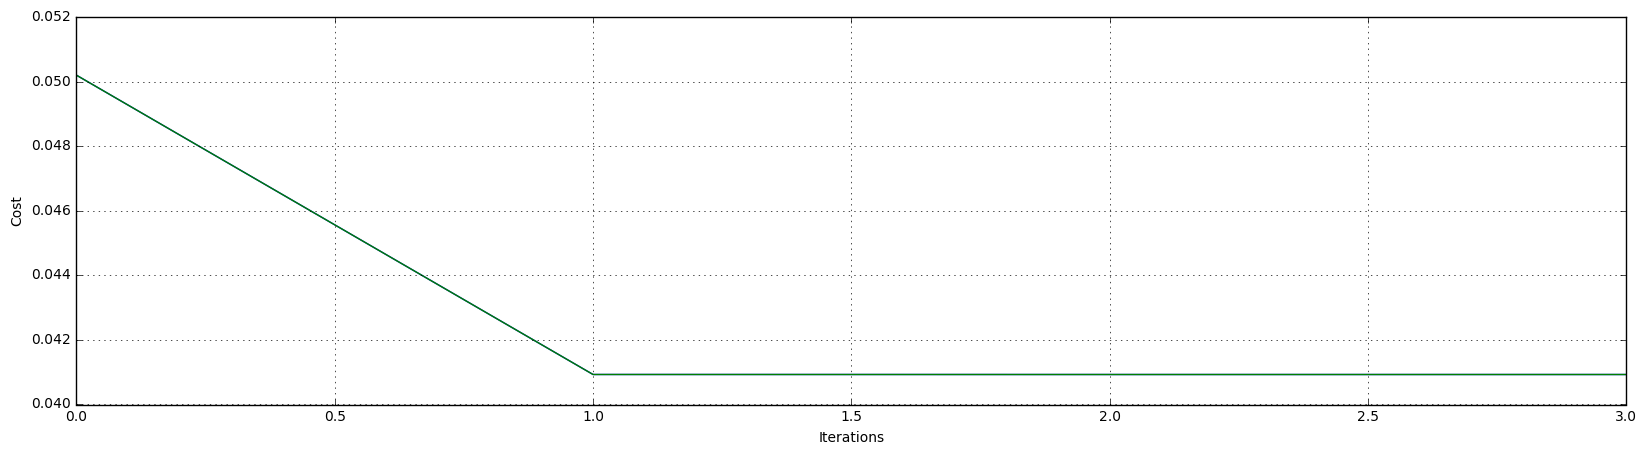

In [53]:
plt.figure(figsize=(20,5))
plt.plot(T.J)
plt.plot(T.J)
plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Cost')

## Prediction for Electricity production

In [16]:
f_names_national = [
    '2012 Conso Prod.csv',
    '2013 Conso Prod.csv',
    '2014 Conso Prod.csv',
    '2015 Conso Prod.csv'
]

datas = []

data_news = []
for f_name in f_names_national:
    print(f_name)
    
    data = pd.read_csv('data/'+ f_name, delimiter='\t', encoding = "ISO-8859-1")
    pd.set_option('max_columns', 100)
    headers = list(data)
    data = data[data.Consommation.notnull()]
    data = data[data.Date.notnull()]
    data['timestamp'] = [str(d) + ' ' + str(t) for d, t in zip(data['Date'].values, data['Heures'].values)]
    data['timestamp'] = pd.to_datetime(data['timestamp'], format='%Y-%m-%d %H:%M')
    datas.append(data)

data_final = pd.concat(datas)

# data_new = datas[0]
# for data in datas[1:]:
#     data_new = pd.merge(data_new, data, how='outer', on='timestamp')


2012 Conso Prod.csv


/home/benlet/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2013 Conso Prod.csv


/home/benlet/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2014 Conso Prod.csv
2015 Conso Prod.csv


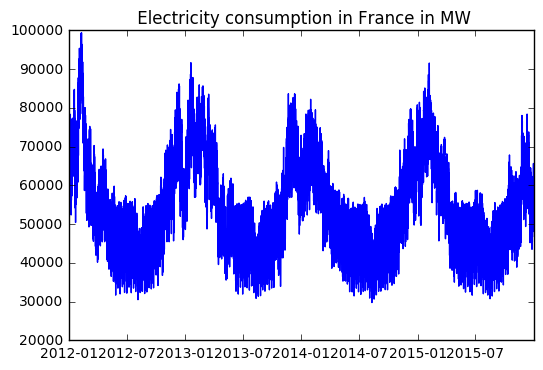

In [17]:
ts =pd.Series(data_final['Consommation'].values, index = data_final['timestamp'].values )
fig, ax = plt.subplots()
ax.plot(ts[::10].index, ts[::10])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_title(" Electricity consumption in France in MW")


In [20]:
# # result[pd.notnull(result['1'])]
# path =r"data\TG_STAID000322.txt"
# path.replace('\\','/')

# Temp = pd.read_csv(path)
# # list(Temp)
# Temp['timestamp'] = pd.to_datetime(Temp['    DATE'], format='%Y%m%d')
# Temp_series = pd.Series(-Temp['   TG'].values, index = Temp['timestamp'].values )
# Temp_series = Temp_series['2012-01-01':'2015-12-31']
# Temp_series.plot(title= "-1 * Mean temperature at Rennes / France" )
# result  = pd.concat([ts,  Temp_series], axis=1)

In [22]:
data_final

,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques,Taux de Co2,Ech. comm. Angleterre,Ech. comm. Espagne,Ech. comm. Italie,Ech. comm. Suisse,Ech. comm. Allemagne-Belgique,Fioul - TAC,Fioul - Cogén.,Fioul - Autres,Gaz - TAC,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,timestamp
0,France,Données définitives,2012-01-01,00:00,58315.0,58200.0,58200.0,492.0,25.0,3816.0,52697.0,3588.0,0.0,7922.0,-1139.0,719.0,-9806.0,33.0,-1750,-1200,-862,-2625,-2940,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,2012-01-01 00:00:00
2,France,Données définitives,2012-01-01,00:30,58315.0,57200.0,56900.0,492.0,25.0,3816.0,52697.0,3588.0,0.0,7922.0,-1139.0,719.0,-9806.0,33.0,-1750,-1200,-862,-2625,-2940,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,2012-01-01 00:30:00
4,France,Données définitives,2012-01-01,01:00,56231.0,55200.0,55100.0,492.0,25.0,3834.0,51747.0,3536.0,0.0,7598.0,-1730.0,721.0,-9993.0,34.0,-1750,-1400,-862,-2625,-2714,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,2012-01-01 01:00:00
6,France,Données définitives,2012-01-01,01:30,56075.0,56000.0,55400.0,491.0,25.0,3832.0,51950.0,3526.0,0.0,7299.0,-2134.0,722.0,-9636.0,35.0,-1750,-1400,-862,-2625,-2714,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,2012-01-01 01:30:00
8,France,Données définitives,2012-01-01,02:00,55532.0,56000.0,55000.0,492.0,25.0,3839.0,51625.0,3535.0,0.0,7159.0,-2449.0,719.0,-9412.0,35.0,-1750,-1400,-862,-2327,-1088,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,2012-01-01 02:00:00
10,France,Données définitives,2012-01-01,02:30,54911.0,55500.0,53600.0,492.0,26.0,3836.0,49917.0,3572.0,0.0,6772.0,-2486.0,720.0,-7938.0,36.0,-1750,-1400,-862,-2327,-1088,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,2012-01-01 02:30:00
12,France,Données définitives,2012-01-01,03:00,52496.0,52400.0,51100.0,494.0,25.0,3836.0,47811.0,3616.0,0.0,6507.0,-2685.0,720.0,-7827.0,38.0,-1750,-1400,-862,-2125,-2038,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,2012-01-01 03:00:00
14,France,Données définitives,2012-01-01,03:30,50664.0,50800.0,49200.0,491.0,24.0,3818.0,46306.0,3628.0,0.0,6460.0,-2495.0,726.0,-8295.0,39.0,-1750,-1400,-862,-2125,-2038,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,2012-01-01 03:30:00
16,France,Données définitives,2012-01-01,04:00,49161.0,49100.0,47600.0,492.0,24.0,3824.0,44378.0,3648.0,0.0,6559.0,-2490.0,720.0,-7993.0,40.0,-1750,-1400,-862,-2125,-1967,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,2012-01-01 04:00:00
18,France,Données définitives,2012-01-01,04:30,47596.0,47800.0,46400.0,492.0,24.0,3822.0,42483.0,3575.0,0.0,6471.0,-2188.0,721.0,-7803.0,41.0,-1750,-1400,-862,-2125,-1967,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,2012-01-01 04:30:00
